In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\GitHub_Data_Analysis\cleaned_github_data.csv")
df.head()

,owner_name,repo_name,language,license_name,stargazers_count,forks_count,open_issues_count,watchers_count,created_at,updated_at,pushed_at
0,freeCodeCamp,freeCodeCamp,TypeScript,Permissive,425796,41197,298,425796,24-12-2014,15-08-2025,15-08-2025
1,codecrafters-io,build-your-own-x,Markdown,Other/Unknown,410406,38494,408,410406,09-05-2018,15-08-2025,29-07-2025
2,sindresorhus,awesome,Unknown,Special-use,391821,31169,52,391821,11-07-2014,15-08-2025,18-07-2025
3,EbookFoundation,free-programming-books,Python,Special-use,365083,63906,40,365083,11-10-2013,15-08-2025,09-08-2025
4,public-apis,public-apis,Python,Permissive,361355,37923,545,361355,20-03-2016,15-08-2025,20-05-2025


### AUTO EDA

### Univariate Analysis 

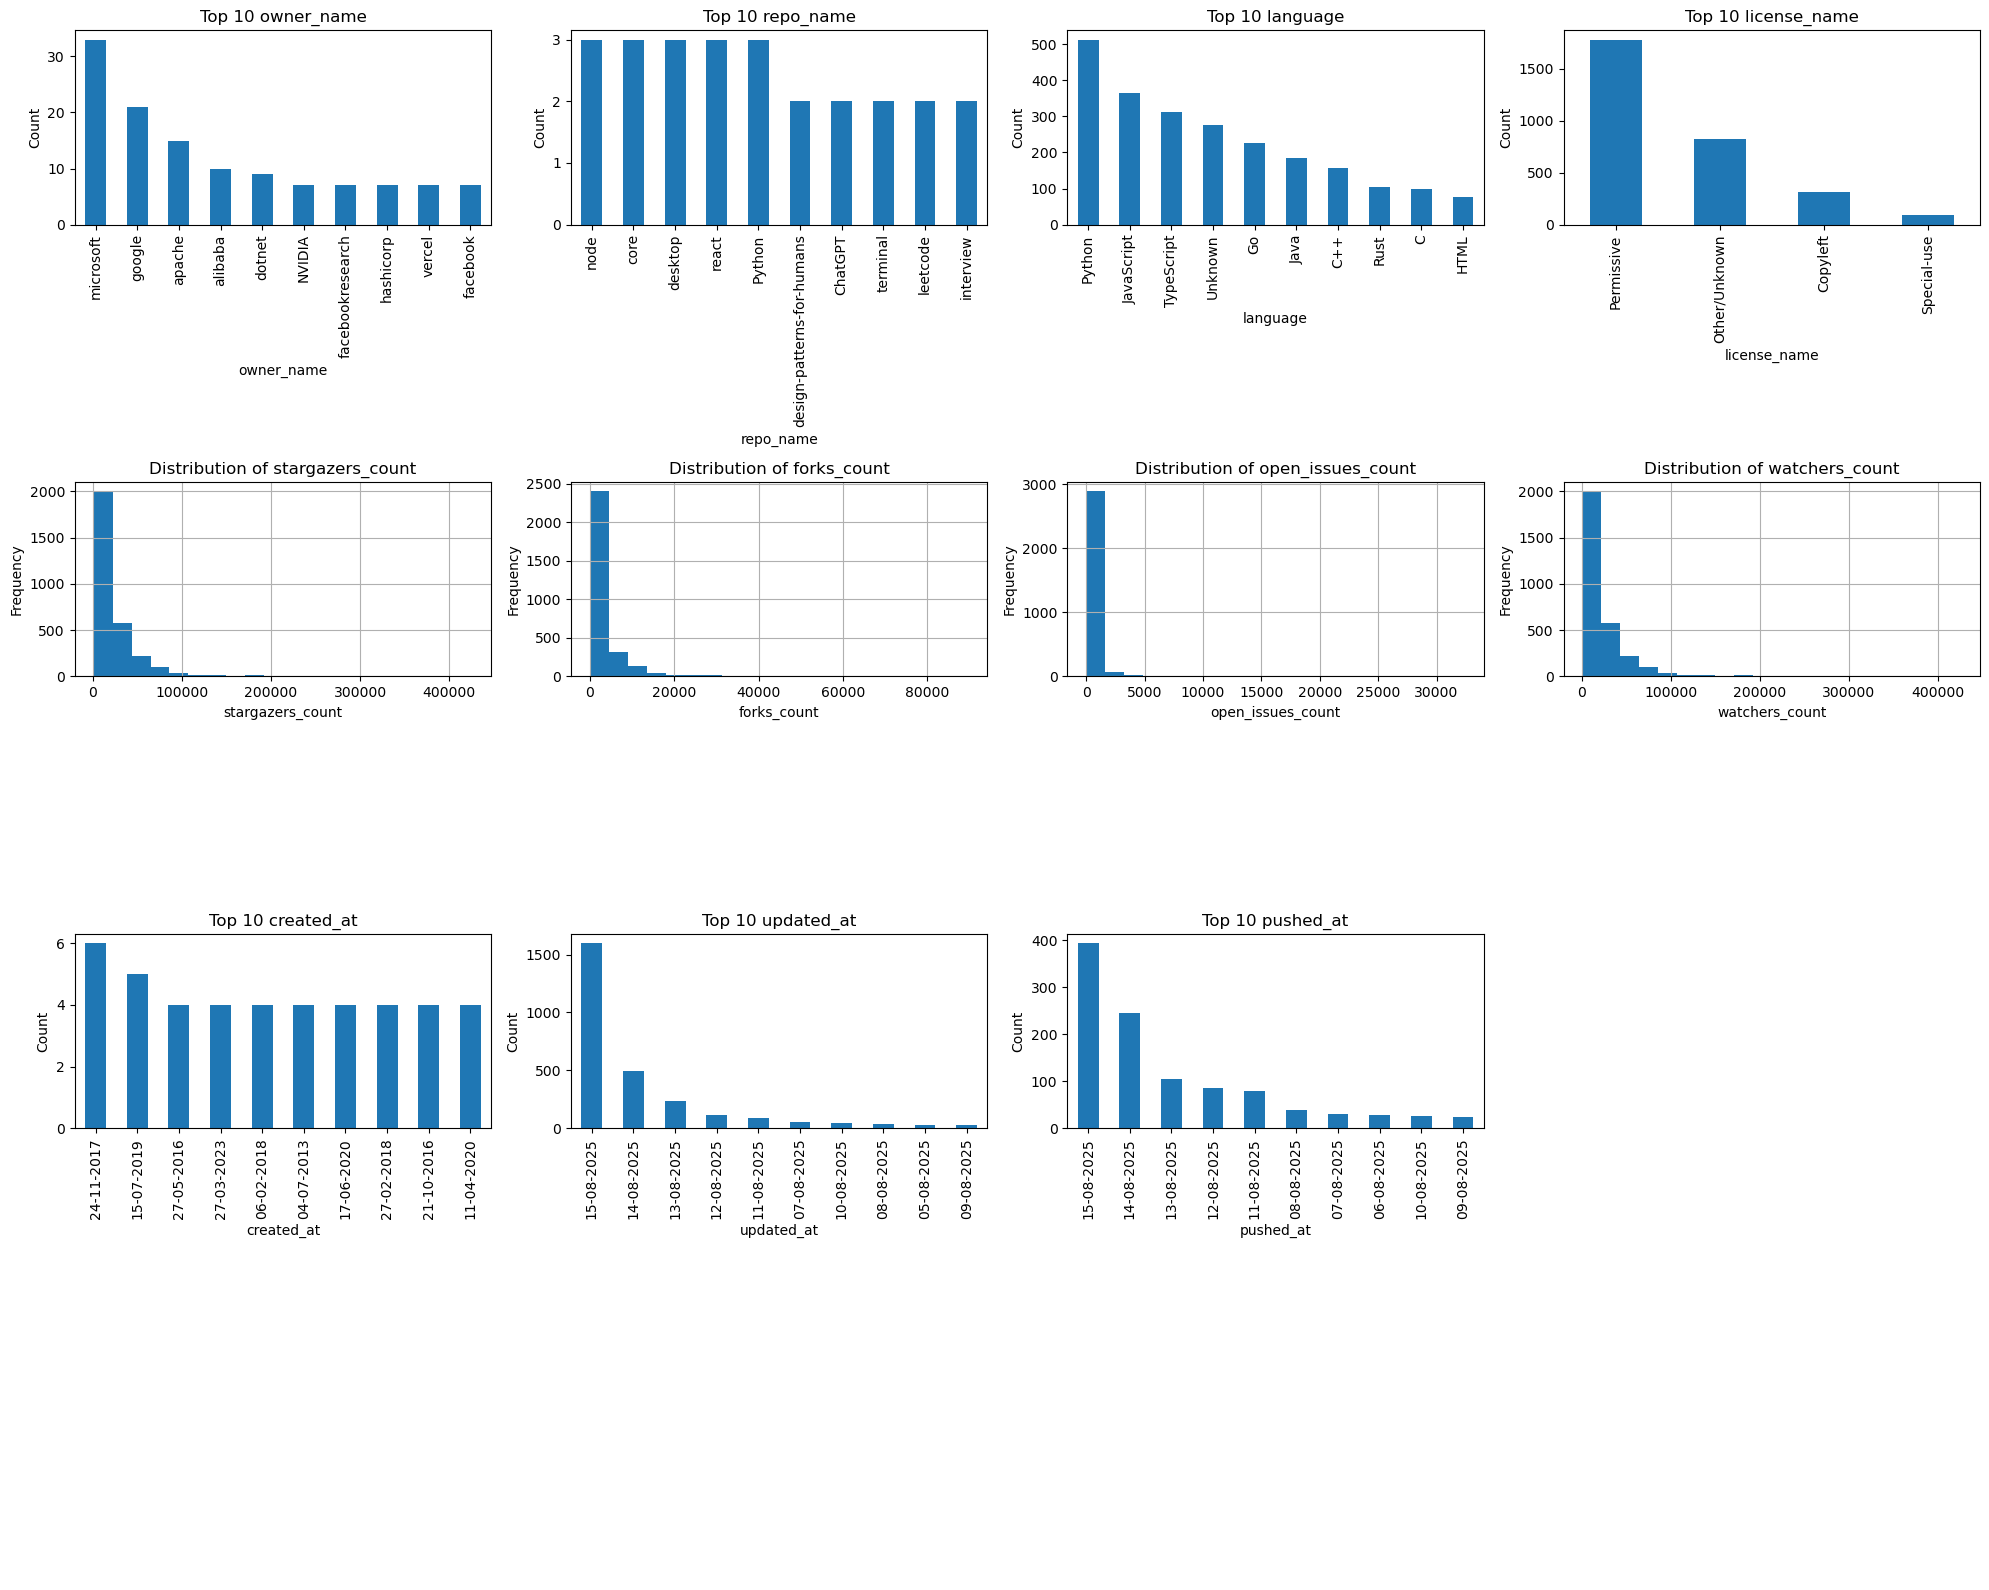

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def auto_eda(df, top_n=10):
    num_cols = len(df.columns)
    cols_per_fig = 16  # 4x4 grid
    total_figs = (num_cols // cols_per_fig) + 1

    for fig_idx in range(total_figs):
        fig, axes = plt.subplots(4, 4, figsize=(20, 16))
        axes = axes.flatten()

        for i in range(cols_per_fig):
            col_idx = fig_idx * cols_per_fig + i
            if col_idx >= num_cols:
                axes[i].axis("off")  # empty space if no column
                continue

            col = df.columns[col_idx]
            ax = axes[i]

            if pd.api.types.is_numeric_dtype(df[col]):
                # Numeric → histogram
                df[col].dropna().hist(bins=20, ax=ax)
                ax.set_title(f"Distribution of {col}")
                ax.set_xlabel(col)
                ax.set_ylabel("Frequency")
            else:
                # Categorical → bar chart
                df[col].value_counts().head(top_n).plot(
                    kind="bar", ax=ax, title=f"Top {top_n} {col}"
                )
                ax.set_xlabel(col)
                ax.set_ylabel("Count")

        plt.tight_layout()
        plt.show()
        
auto_eda(df, top_n=10)

#### ----------------------------------------------------------------------------------------------------------------------------------------------
### Summary of Univariate Analysis 
#### 1. Top Contributors:

##### >> microsoft, google, and alibaba are the leading repository owners.

##### >> Popular repos include node, core, chatGPT, and Python.

#### 2. Languages:

##### >> Python, JavaScript, and TypeScript dominate, followed by Go and C++.

#### 3. Licenses:

##### >> The Permissive license type is the most common, with some projects having unknown or copy-left licenses.

#### 4. Repository Popularity (Distributions):

##### >> Most repositories have low stargazers, forks, open issues, and watchers, with only a few having very high counts (long-tail distribution).

#### 5. Timestamps:

##### >> Creation dates are spread across years.

##### >> Most repositories have recent updates and pushes, showing active maintenance.

#### ---------------------------------------------------------------------------------------------------------------------------------------------

## Bivariate analysis | Numeric vs Numeric Columns

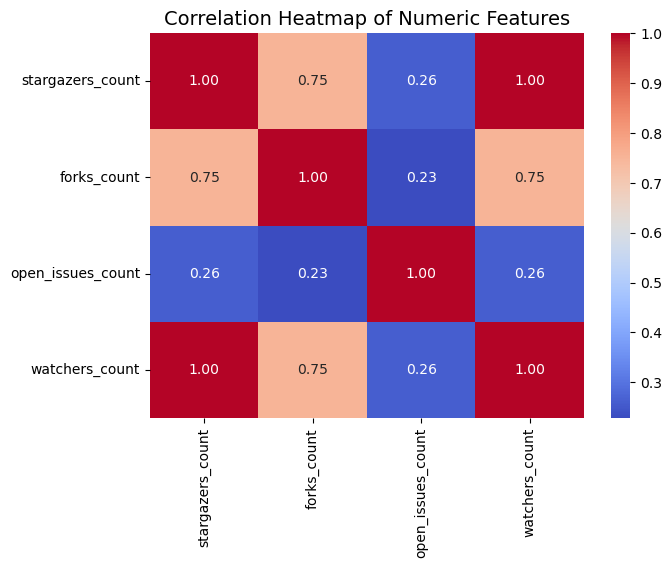

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Numeric columns
numeric_columns = ['stargazers_count', 'forks_count', 'open_issues_count', 'watchers_count']

# Compute Correlation Matrix

corr = df[numeric_columns].corr()    #1 → perfect positive correlation, 0 → no correlation, -1 → perfect negative correlation

# Plot Correlation
plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

#### ---------------------------------------------------------------------------------------------------------------------------------------------
#### Summary of Bivariate Analysis 
#### 1. Stars vs Forks: There is a moderate positive correlation (0.75) – projects with more stars generally have more forks, though not perfectly linear.
#### 2. Stars vs Watchers: Shows a perfect correlation (1.0) – as stars increase, watchers also increase proportionally.

#### 3. Stars vs Open Issues: Very low correlation (0.26) – the number of issues does not depend much on stars.

#### 4. Forks vs Watchers: Also moderately correlated (0.75) – popular repositories with many forks often attract watchers too.

#### ---------------------------------------------------------------------------------------------------------------------------------------------

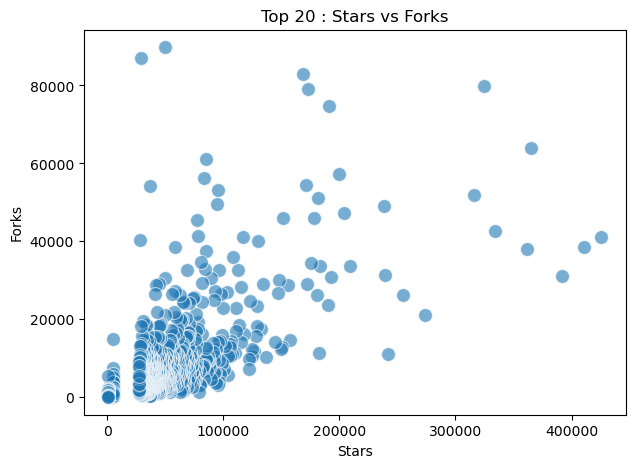

In [14]:
# Scatter Plot: Stars vs Forks 
plt.figure(figsize=(7,5))
sns.scatterplot(x="stargazers_count", y="forks_count", data=df, s=100, alpha=0.6)
plt.title("Top 20 : Stars vs Forks")
plt.xlabel("Stars")
plt.ylabel("Forks")
plt.show()



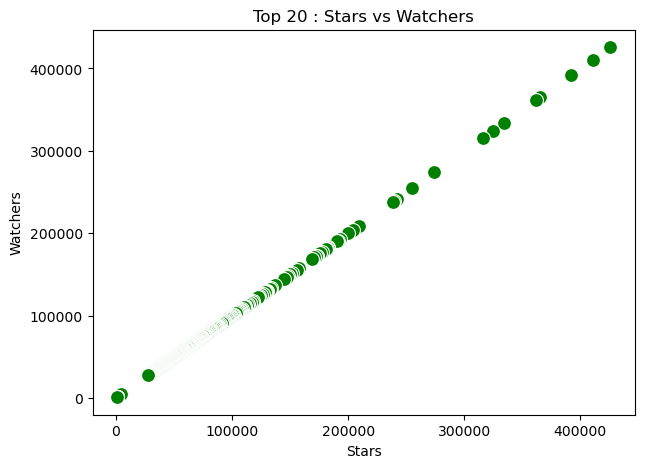

In [15]:
# Scatter Plot: Stars vs Watchers 
plt.figure(figsize=(7,5))
sns.scatterplot(x="stargazers_count", y="watchers_count", data=df, s=100, color="green")
plt.title("Top 20 : Stars vs Watchers")
plt.xlabel("Stars")
plt.ylabel("Watchers")
plt.show()

#### ---------------------------------------------------------------------------------------------------------------------------------------------
#### Summary of Scatter Plots | Bivariate Analysis
#### 1. Stars vs Forks:
##### >> The scatter plot shows a moderate positive relationship. Repositories with higher stars tend to have more forks, but the distribution is scattered, indicating that fork counts vary significantly even among projects with similar star counts.

#### 2. Stars vs Watchers :
##### >> This plot shows a very strong linear relationship. As the number of stars increases, the watchers increase almost proportionally, suggesting that stars and watchers are highly correlated measures of popularity.
#### ---------------------------------------------------------------------------------------------------------------------------------------------

### Categorical vs Numerical Columns 

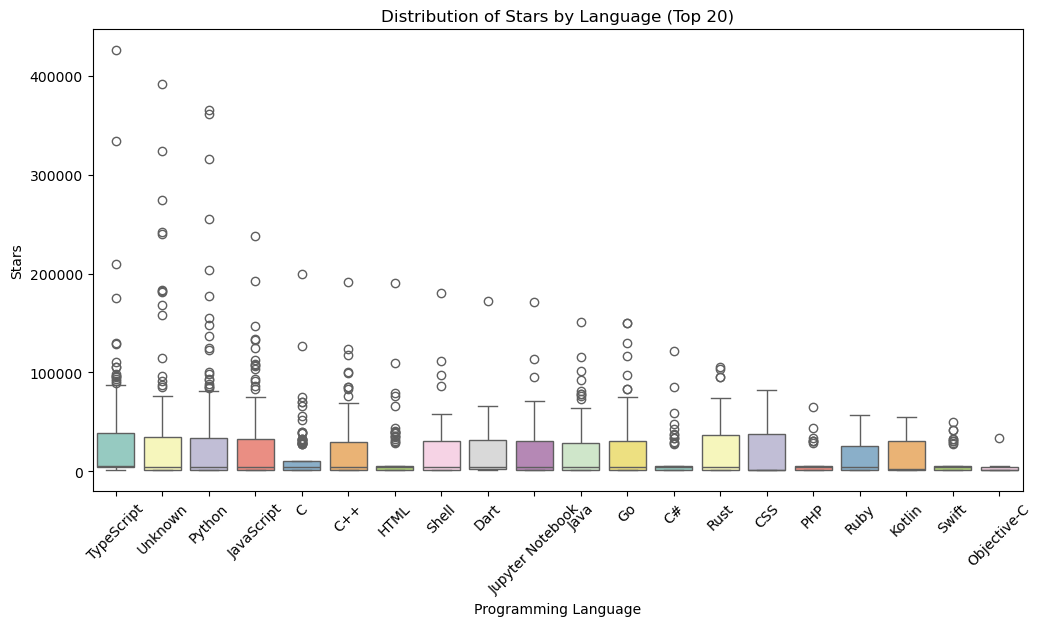

In [6]:
# 1. Distribution  of Stars by Language
# Top 10 Languages by Repo Count ---
top_languages = df["language"].value_counts().head(20).index
df_lang = df[df["language"].isin(top_languages)]

# --- Boxplot: Stars by Language ---
plt.figure(figsize=(12,6))
sns.boxplot(x="language", y="stargazers_count", data=df_lang, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribution of Stars by Language (Top 20)")
plt.ylabel("Stars")
plt.xlabel("Programming Language")
plt.show()


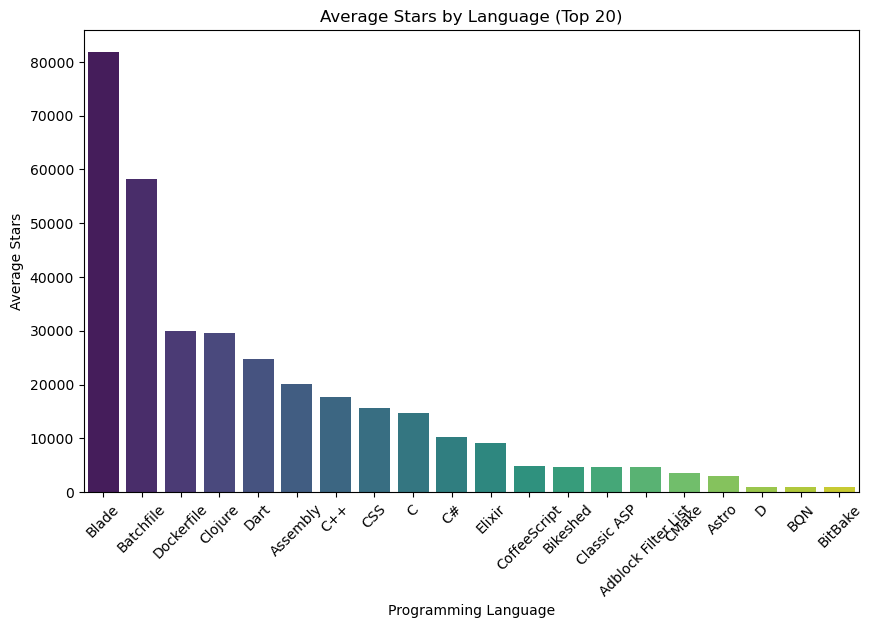

In [17]:
# 1. Average stars by language 
avg_stars = df.groupby("language")["stargazers_count"].mean().head(20).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_stars.index, y=avg_stars.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Stars by Language (Top 20)")
plt.ylabel("Average Stars")
plt.xlabel("Programming Language")
plt.show()


#### ---------------------------------------------------------------------------------------------------------------------------------------------
#### Summary of Stars by Language | Bivariate Analysis
#### 1. Stars by Language Distribution: Popular languages like TypeScript, Python, and JavaScript have many highly starred projects, but star counts vary widely.

#### 2. Average Stars by Language: Niche languages like Blade, Batchfile, and Dockerfile have the highest average stars, showing fewer but very popular projects.
#### ---------------------------------------------------------------------------------------------------------------------------------------------

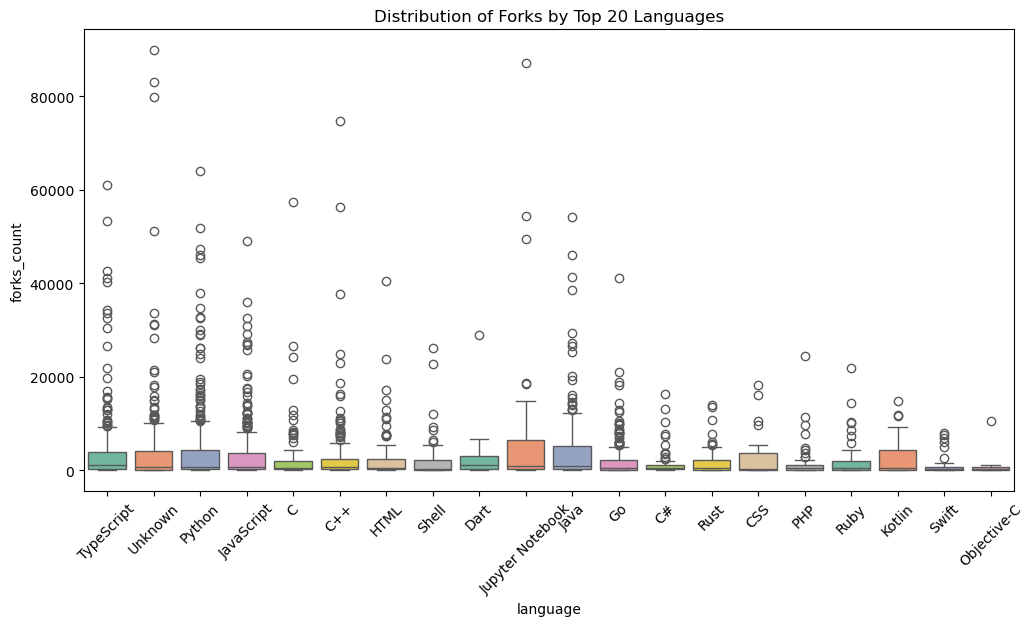

In [8]:
# 2. Distribution of forks by language 
top_languages = df["language"].value_counts().head(20).index
df_top = df[df["language"].isin(top_languages)]

plt.figure(figsize=(12,6))
sns.boxplot(x="language", y="forks_count", data=df_top, palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribution of Forks by Top 20 Languages")
plt.show()


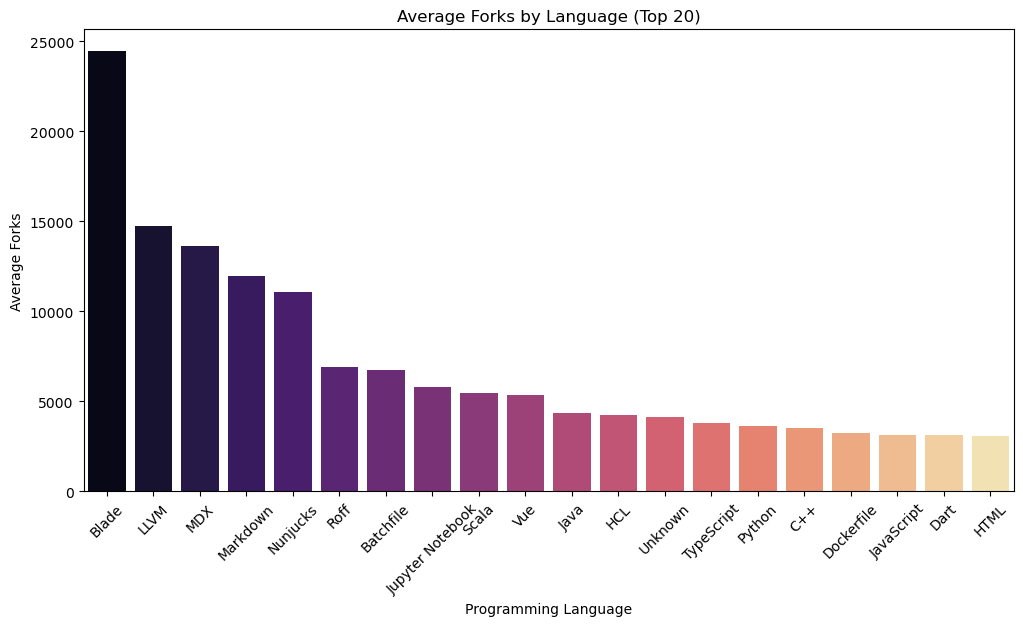

In [9]:
# 2. Average Forks by Language (Top 20) 
avg_forks = df.groupby("language")["forks_count"].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_forks.index, y=avg_forks.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Average Forks by Language (Top 20)")
plt.ylabel("Average Forks")
plt.xlabel("Programming Language")
plt.show()


#### ---------------------------------------------------------------------------------------------------------------------------------------------
#### Summary of Forks by Language 
#### 1. Forks Distribution by Language: Popular languages like TypeScript, Python, and JavaScript show a wide range of fork counts, with many high outliers.

#### 2. Average Forks by Language: Blade, LLVM, MDX, and Markdown have the highest average forks, showing that niche languages can host very popular, highly forked projects.
#### ---------------------------------------------------------------------------------------------------------------------------------------------

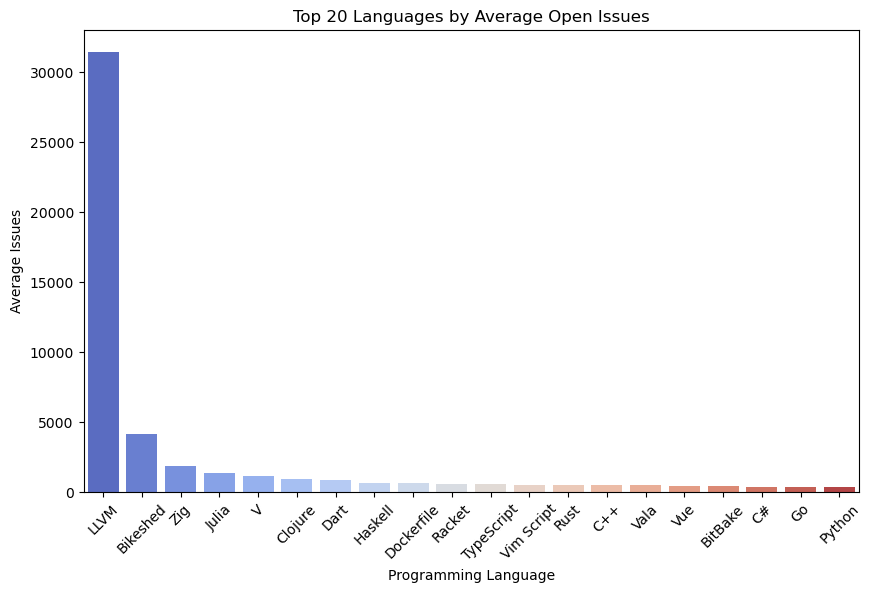

In [10]:
# 3. Average open issues by language (Top 20) 
avg_issues = (
    df.groupby("language")["open_issues_count"].mean().sort_values(ascending=False).head(20)   # only top 10 languages
)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_issues.index, y=avg_issues.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 20 Languages by Average Open Issues")
plt.ylabel("Average Issues")
plt.xlabel("Programming Language")
plt.show()


#### ---------------------------------------------------------------------------------------------------------------------------------------------
#### Summary of Languages by Average Open Issues

#### 1. Language by Average Open Issues: Languages like LLVM, Bikeshed, Zig, Juila and V have the highest Average issues, and considering this language to reduce the issues, bugs or errors in overall lanugaes

#### ---------------------------------------------------------------------------------------------------------------------------------------------

### Categorical vs Categorical

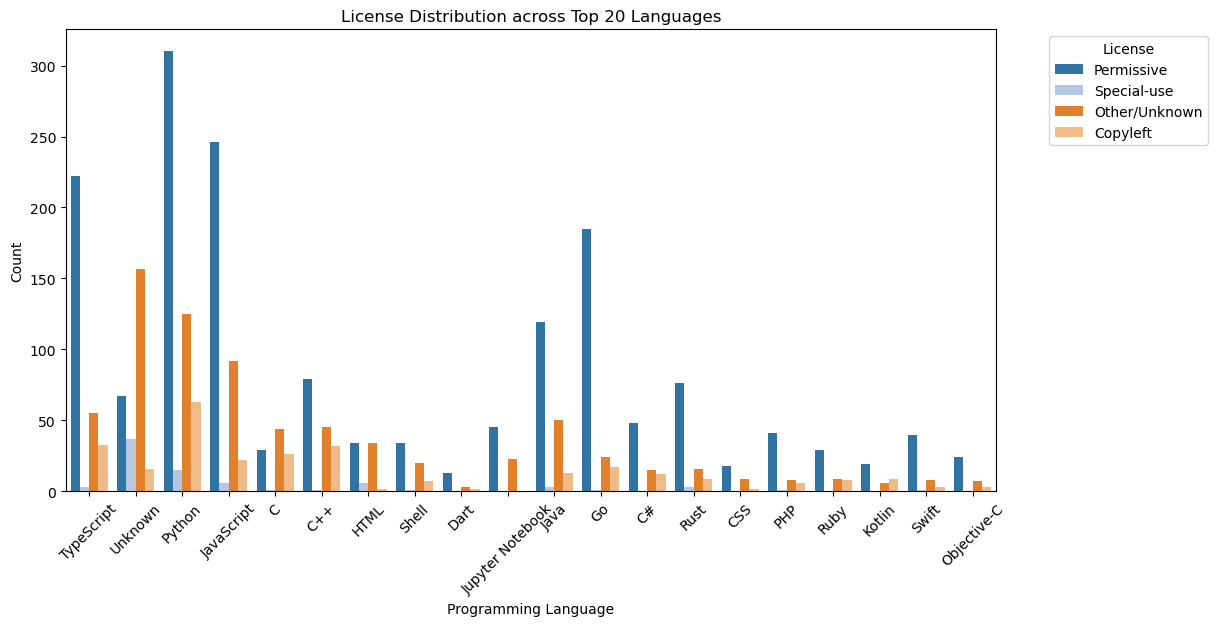

In [12]:
# Get top 20 languages by count
top20_langs = df['language'].value_counts().head(20).index
df_top20 = df[df['language'].isin(top20_langs)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top20, x="language", hue="license_name", palette="tab20")
plt.xticks(rotation=45)
plt.title("License Distribution across Top 20 Languages")
plt.xlabel("Programming Language")
plt.ylabel("Count")
plt.legend(title="License", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### --------------------------------------------------------------------------------------------------------------------------------------------

### Summary License Distribution across Top 20 Languages 

#### 1. Permissive licenses dominate across most programming languages, especially in Python, TypeScript, and JavaScript.

#### 2. A significant number of projects also fall under Other/Unknown licenses, particularly for “Unknown” and Python.

#### 3. Copyleft and Special-use licenses are less common but still appear in some languages.

### Insight: Most repositories prefer permissive licenses, indicating a strong trend towards open and flexible code usage.
#### --------------------------------------------------------------------------------------------------------------------------------------------